### Part A & B:
Split data file into 100 files and making directories and send each data set to corresponding directory.

In [2]:
import numpy as np
import os

# Load the data file with one column of data
data = np.loadtxt('data.txt')

# Number of splits
n_splits = 100
data_per_file = len(data) // n_splits

# Create directories and process files in a single loop
for i in range(n_splits):
    # Define the range for each split
    split_data = data[i * data_per_file : (i + 1) * data_per_file]
    
    # Create a new directory for each split
    dir_name = f'dataset_{i+1}'
    os.makedirs(dir_name, exist_ok=True)
    
    # Define the path for the new split file
    split_filename = f'data_split_{i+1}.txt'
    new_path = os.path.join(dir_name, split_filename)
    
    # Save the split data to the new file in the corresponding directory
    np.savetxt(new_path, split_data)

print("Data files have been split and moved to directories successfully.")


Data files have been split and moved to directories successfully.


### Part C:

In [3]:

# Function to compute the Top-Hat kernel PDF
def top_hat_pdf(data, x, h):
    n = len(data)
    return np.sum(np.abs((x - data) / h) <= 1) / (n * (2 * h))

# Bandwidths for Top-Hat kernel
bandwidths = [0.1, 0.01, 0.001]

# List to store PDFs
pdfs = []

# Load each dataset and compute the PDF
for i in range(1, 101):
    # Load the dataset
    file_path = f'dataset_{i}/data_split_{i}.txt'
    data = np.loadtxt(file_path)
    
    # Create a range of x values for which to compute the PDF
    x_values = np.linspace(min(data) - 1, max(data) + 1, 1000)
    
    # Calculate PDF for each bandwidth
    pdf_results = {}
    for h in bandwidths:
        pdf_values = [top_hat_pdf(data, x, h) for x in x_values]
        pdf_results[h] = pdf_values
    
    pdfs.append(pdf_results)


# Normalize the PDFs if needed
for dataset_pdfs in pdfs:
    for h, pdf_values in dataset_pdfs.items():
        dx = x_values[1] - x_values[0]
        area = np.sum(pdf_values) * dx
        if not np.isclose(area, 1, atol=0.01):
            # Normalize the PDF
            pdf_values /= area


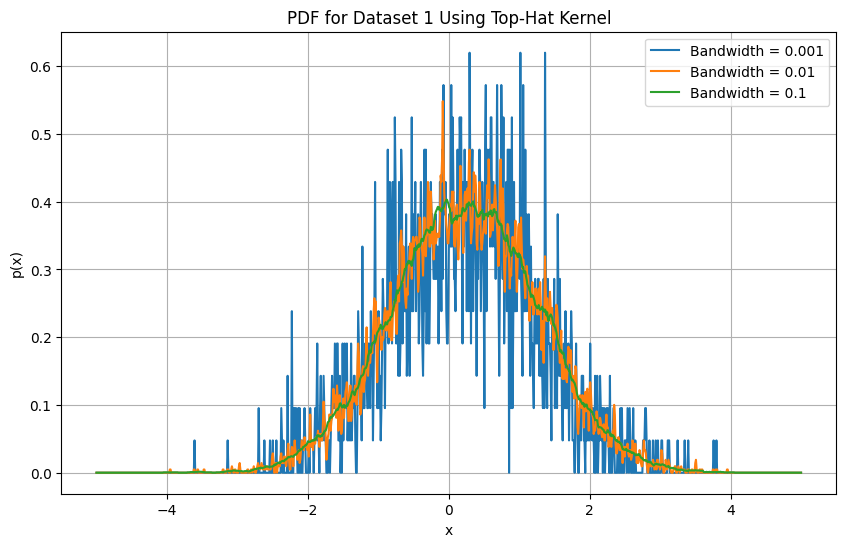

In [4]:

import matplotlib.pyplot as plt

# Plotting PDF for dataset 1 using bandwidth 0.1
plt.figure(figsize=(10, 6))
x_vals = np.linspace(-5, 5, 1000)
plt.plot(x_vals, pdfs[0][0.001], label='Bandwidth = 0.001')
plt.plot(x_vals, pdfs[0][0.01], label='Bandwidth = 0.01')
plt.plot(x_vals, pdfs[0][0.1], label='Bandwidth = 0.1')
plt.title('PDF for Dataset 1 Using Top-Hat Kernel')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.grid()
plt.show()


### Part D:

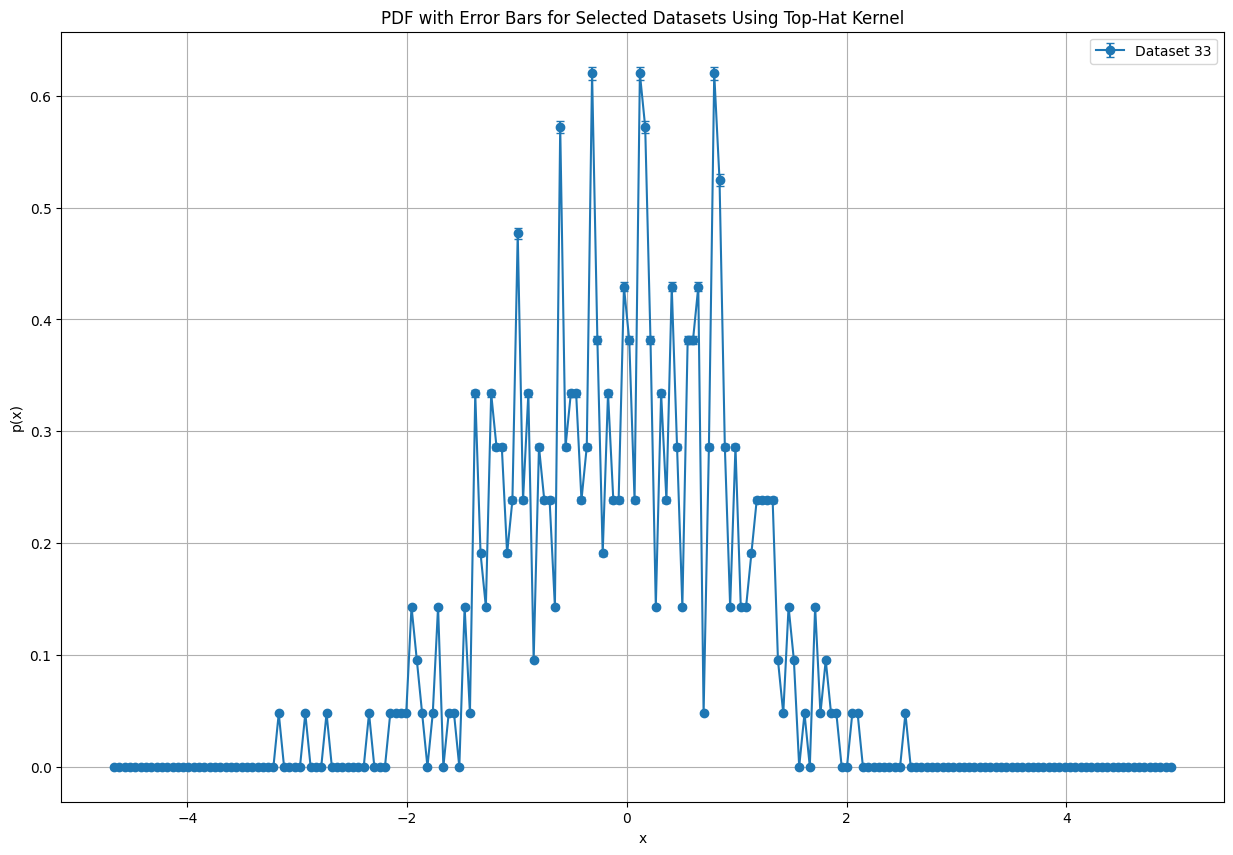

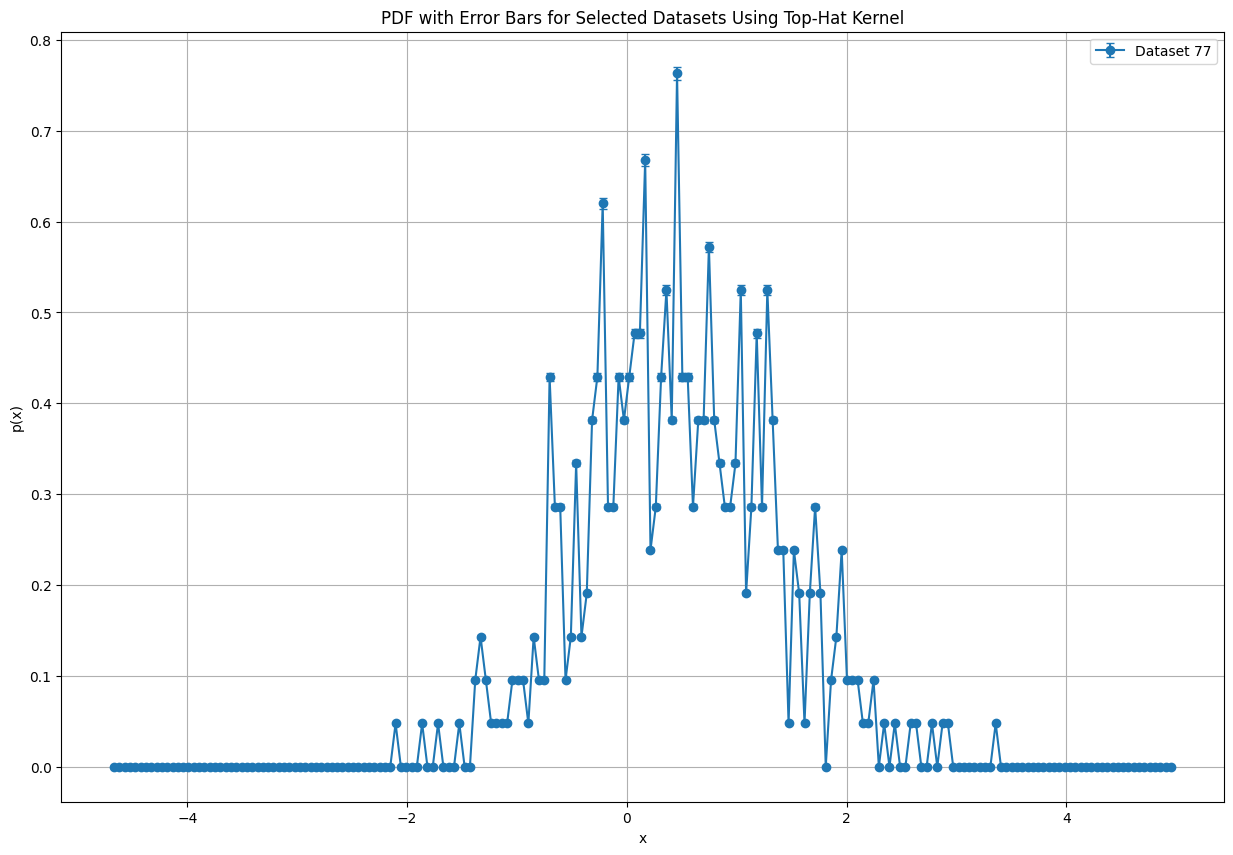

In [5]:

# Function to compute the Top-Hat kernel PDF and its uncertainty
def top_hat_pdf_and_uncertainty(data, x, h):
    n = len(data)
    pdf_value = np.sum(np.abs((x - data) / h) <= 1) / (n * (2 * h))
    uncertainty = pdf_value / np.sqrt(n)  # Approximation for uncertainty
    return pdf_value, uncertainty


# Load datasets and compute PDF and uncertainty for a selected dataset
selected_datasets = [33, 77]  # Example: using datasets 33, and 77 for demonstration
pdfs_with_uncertainty = {}

for i in selected_datasets:
    # Load the dataset
    file_path = f'dataset_{i}/data_split_{i}.txt'
    data = np.loadtxt(file_path)
    
    # Create a range of x values for which to compute the PDF
    x_values = np.linspace(-5, 5, 200)
    
    # Calculate PDF and uncertainty for each bandwidth
    pdf_results = {}
    for h in bandwidths:
        pdf_values = []
        uncertainties = []
        for x in x_values:
            pdf_value, uncertainty = top_hat_pdf_and_uncertainty(data, x, h)
            pdf_values.append(pdf_value)
            uncertainties.append(uncertainty)
        
        pdf_results[h] = (pdf_values, uncertainties)
    
    pdfs_with_uncertainty[i] = pdf_results


# Plotting PDF with error bars for each selected dataset and a specific bandwidth

for i in selected_datasets:
    x_vals = np.linspace(min(data) - 1, max(data) + 1, 200)
    pdf_values, uncertainties = pdfs_with_uncertainty[i][0.001]  # Using bandwidth 0.1 for plotting
    plt.figure(figsize=(15, 10))
    plt.errorbar(x_vals, pdf_values, yerr=uncertainties, label=f'Dataset {i}', capsize=3, fmt='-o')

    plt.title('PDF with Error Bars for Selected Datasets Using Top-Hat Kernel')
    plt.xlabel('x')
    plt.ylabel('p(x)')
    plt.legend()
    plt.grid()
    plt.show()


### Part E 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function for smoothing
def smoothing_function(x, sigma):
    normalization_factor = np.sqrt(2 * np.pi * sigma)
    return np.exp(-x**2 / (2 * sigma)) #/normalization_factor

# Parameters
sigma_values = [2, 0.2]

# Range of x-values
x_values = np.linspace(-5, 5, 1000) 

# Apply smoothing and plot
for i in selected_datasets:
    dataset_pdfs = pdfs[i]  # PDF dictionary for the current dataset

    for h, original_pdf in dataset_pdfs.items():
        # Create a plot for each bandwidth
        plt.figure(figsize=(10, 6))
        plt.plot(x_values, original_pdf, label=f'Original PDF (h={h})', color='black')

        # Apply smoothing for each sigma
        for sigma in sigma_values:
            plt.plot(x_values, smoothing_function(x_values, sigma), label=f'Smoothing Function (sigma={sigma})', color=('red' if sigma == 2 else 'yellow'))
            smoothed_pdf = original_pdf * smoothing_function(x_values, sigma)
         
            plt.plot(x_values, smoothed_pdf, label=f'Smoothed PDF (sigma={sigma})')

        plt.title(f"PDF Smoothing for Dataset {i}, Bandwidth h={h}")
        plt.xlabel("x")
        plt.ylabel("p(x)")
        plt.legend()
        plt.grid()
        plt.show()


### Interpretation of Smoothing Results
Smoothing Effectiveness: Higher 
σ values (such as 2) lead to a more pronounced smoothing, which is useful for reducing noise and getting a clear, general trend. However, this comes at the cost of losing fine details and potentially oversmoothing, especially if the data has multiple peaks or non-Gaussian features.

Control Over Detail: Lower σ values (like 0.2) preserve more detail and are less likely to oversmooth the data. However, this can leave some noise present.

### Part E 2

In [ ]:

def compute_joint_pdf(data, tau, num_bins=100):
    """Compute two-point PDF p(x(t+tau), x(t)) for a given time lag tau."""
    joint_counts, x_edges, y_edges = np.histogram2d(data[:-tau], data[tau:], bins=num_bins, density=True)
    x_centers = (x_edges[1:] + x_edges[:-1]) / 2
    y_centers = (y_edges[1:] + y_edges[:-1]) / 2
    return joint_counts, x_centers, y_centers

def compute_one_point_pdf(data, num_bins=100):
    """Compute one-point PDF p(x) for given data."""
    counts, bin_edges = np.histogram(data, bins=num_bins, density=True)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
    return counts, bin_centers

def delta_tau(data, tau, num_bins=100):
    """Compute Δ(τ) as the integral of |p(x(t+tau), x(t)) - p(x(t+tau)) p(x(t))|."""
    joint_pdf, x_centers, y_centers = compute_joint_pdf(data, tau, num_bins)
    p_xt, _ = compute_one_point_pdf(data[:-tau], num_bins)
    p_xtau, l = compute_one_point_pdf(data[tau:], num_bins)
    
    # Initialize delta
    delta = 0.0
    
    # Loop over the bins in the grid
    for i in range(num_bins - 1):
        for j in range(num_bins - 1):
            # Calculate the width and height of the current cell
            dx_i = x_centers[i + 1] - x_centers[i]    # Width of cell in x direction
            dy_j = y_centers[j + 1] - y_centers[j]    # Height of cell in y direction
            cell_area = dx_i * dy_j                    # Area of the current cell
    
            # Calculate product of individual PDFs at these bins
            product_pdf = p_xt[i] * p_xtau[j]
            
            # Accumulate the absolute difference, scaled by cell area
            delta += np.abs(joint_pdf[i, j] - product_pdf) * cell_area
    
    # Return delta after summing over all bins
    return delta


# Parameters
taus = np.arange(1, 500)  # Range of tau values
num_bins = 500  # Number of bins for PDF calculation


datasets_h01 = []
datasets_h001 = []
datasets_h0001 = []
# Loop through only the first 5 datasets in pdfs
for dataset_idx, dataset_pdfs in enumerate(pdfs[:5]):
    print(f"Processing dataset {dataset_idx + 1}")
    for h, pdf_values in dataset_pdfs.items():
        if h == 0.1:
            datasets_h01.append(pdf_values)
        elif h == 0.01:
            datasets_h001.append(pdf_values)
        else:
            datasets_h0001.append(pdf_values)
            


# Calculate and plot Δ(τ) for each dataset

for i, data in enumerate(datasets_h01):
    delta_values = [delta_tau(data, tau, num_bins) for tau in taus]
    plt.plot(taus, delta_values, label=f'Dataset {i+1}')

plt.title("Δ(τ) as a Function of τ for Different Datasets (h = 0.1)")
plt.xlabel("τ")
plt.ylabel("Δ(τ)")
plt.legend()
plt.grid()
plt.show()

for i, data in enumerate(datasets_h001):
    delta_values = [delta_tau(data, tau, num_bins) for tau in taus]
    plt.plot(taus, delta_values, label=f'Dataset {i+1}')

plt.title("Δ(τ) as a Function of τ for Different Datasets (h = 0.01)")
plt.xlabel("τ")
plt.ylabel("Δ(τ)")
plt.legend()
plt.grid()
plt.show()

for i, data in enumerate(datasets_h0001):
    delta_values = [delta_tau(data, tau, num_bins) for tau in taus]
    plt.plot(taus, delta_values, label=f'Dataset {i+1}')

plt.title("Δ(τ) as a Function of τ for Different Datasets (h = 0.001)")
plt.xlabel("τ")
plt.ylabel("Δ(τ)")
plt.legend()
plt.grid()
plt.show()



Processing dataset 1
Processing dataset 2
Processing dataset 3
Processing dataset 4
Processing dataset 5
